In [ ]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import functions as f
import json

Develop a model using Tensor Flow that will predict Loan Default. 
For your model, do the following:
Try at least three different Activation Functions
Try one and two hidden layers
Try using a Dropout Layer
Explore using a variable selection technique
For each of the models
Calculate the accuracy of the model on both the training and test data set
Create a graph that shows the ROC curves for both the training and test data set. Clearly label each curve and display the Area Under the ROC curve.
Display a ROC curve for the test data with all your models on the same graph (tree based, regression, and TF). Discuss which one is the most accurate. Which one would you recommend using?

In [ ]:
# Opening JSON file and save as a dict
winners_dict = open('../Module_3/winners.json')
winners_dict = json.load(winners_dict)


In [ ]:

target_a = 'TARGET_BAD_FLAG'
target_b = 'IMP_O_TARGET_LOSS_AMT'

keep_features= winners_dict['sfs_best_model']

In [ ]:
df = f.clean_df(file_path= '../../data_sets/SA_clean_O_fixed_HMEQ_Loss.csv', remove_cols=['z_JOB', 'z_REASON','flag_LOAN', 'Unnamed: 0'])

In [ ]:
#Pre Processing 

In [ ]:
train_cols = list(df.columns.difference((target_a, target_b)))
x_train, x_test, y_train, y_test = f.split_df(df = df.copy(), train_cols=train_cols, 
test_cols = [target_a, target_b], test_size=0.2, rand_seed=1)

In [ ]:
theScaler = MinMaxScaler()
theScaler.fit(x_train)

In [ ]:
u_train = pd.DataFrame(theScaler.transform(x_train))
u_test = pd.DataFrame(theScaler.transform(x_test))
u_train.columns = list(x_train.columns.values)
u_test.columns = list(x_train.columns.values)
u_train_sub= u_train[keep_features]
u_test_sub= u_test[keep_features]

In [ ]:
#Model 1
#I hidden layer
#relu activation function
#feature selected from forward variable selection 

In [61]:
theShapeSize_1 = u_train_sub.shape[1] #the number of input variables 
theActivation_1 = tf.keras.activations.relu
output_activation_1 = tf.keras.activations.softmax
theLossMetric_1 = tf.keras.losses.SparseCategoricalCrossentropy()
theOptimizer_1 = tf.keras.optimizers.Adam()
theEpochs_1 = 100
theUnits_1 = int(2*theShapeSize_1)

LAYER_01_01 = tf.keras.layers.Dense( units=theUnits_1, activation=theActivation_1, input_dim=theShapeSize_1 )
LAYER_OUTPUT_01 = tf.keras.layers.Dense( units=2, activation=output_activation_1 )

model_01 = tf.keras.Sequential()
model_01.add( LAYER_01_01)
model_01.add( LAYER_OUTPUT_01 )

model_01.compile( loss=theLossMetric_1,optimizer=theOptimizer_1)
model_01.fit( u_train_sub, y_train[target_a], epochs=theEpochs_1, verbose=False )


In [62]:
train_acc_01 = f.get_TF_ProbAccuracyScores('TF Train', model_01, u_train_sub, y_train[target_a])
test_acc_01 = f.get_TF_ProbAccuracyScores('TF Test', model_01, u_test_sub, y_test[target_a])

38/38 [==============================] - 0s 943us/step


In [63]:
f.print_Accuracy('TF Accuracy', [train_acc_01,test_acc_01])

TF Accuracy
TF Train  =  0.9018456375838926
TF Test  =  0.8850671140939598
------




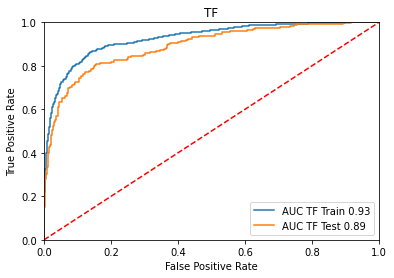

In [64]:
f.print_ROC_Curve('TF', [train_acc_01, test_acc_01])

In [65]:
#Model 2
#2 hidden layer
#relu activation function
#feature selected from forward variable selection 

In [66]:
LAYER_02_01 = tf.keras.layers.Dense( units=theUnits_1, activation=theActivation_1, input_dim=theShapeSize_1 )
LAYER_02_02 = tf.keras.layers.Dense( units=theUnits_1, activation=theActivation_1 )
LAYER_OUTPUT_02 = tf.keras.layers.Dense( units=2, activation=output_activation_1 )

model_02 = tf.keras.Sequential()
model_02.add( LAYER_02_01)
model_02.add( LAYER_02_02)
model_02.add( LAYER_OUTPUT_02 )

model_02.compile( loss=theLossMetric_1,optimizer=theOptimizer_1)
model_02.fit( u_train_sub, y_train[target_a], epochs=theEpochs_1, verbose=False )



In [67]:
train_acc_02= f.get_TF_ProbAccuracyScores('TF Train', model_02, u_train_sub, y_train[target_a])
test_acc_02 = f.get_TF_ProbAccuracyScores('TF Test', model_02, u_test_sub, y_test[target_a])
f.print_Accuracy('TF Accuracy', [train_acc_02,test_acc_02])


38/38 [==============================] - 0s 1ms/step
TF Accuracy
TF Train  =  0.9236577181208053
TF Test  =  0.889261744966443
------




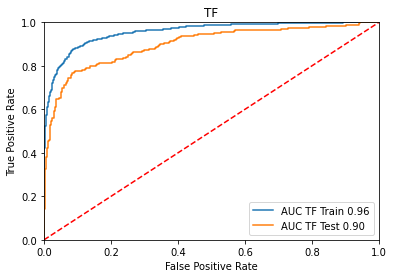

In [68]:
f.print_ROC_Curve('TF', [train_acc_02, test_acc_02])

In [69]:
#Model 3
#2 hidden layer
#drop layer
#relu activation function
#feature selected from forward variable selection 

In [70]:
LAYER_03_01 = tf.keras.layers.Dense( units=theUnits_1, activation=theActivation_1, input_dim=theShapeSize_1 )
LAYER_03_02 = tf.keras.layers.Dense( units=theUnits_1, activation=theActivation_1 )
LAYER_DROP = tf.keras.layers.Dropout( 0.4)
LAYER_OUTPUT_03 = tf.keras.layers.Dense( units=2, activation=output_activation_1 )

model_03 = tf.keras.Sequential()
model_03.add( LAYER_03_01)
model_03.add( LAYER_03_02)
model_03.add( LAYER_DROP)
model_03.add( LAYER_OUTPUT_03 )

model_03.compile( loss=theLossMetric_1,optimizer=theOptimizer_1)
model_03.fit( u_train_sub, y_train[target_a], epochs=theEpochs_1, verbose=False )



In [71]:
train_acc_03= f.get_TF_ProbAccuracyScores('TF Train', model_03, u_train_sub, y_train[target_a])
test_acc_03 = f.get_TF_ProbAccuracyScores('TF Test', model_03, u_test_sub, y_test[target_a])
f.print_Accuracy('TF Accuracy', [train_acc_03,test_acc_03])


38/38 [==============================] - 0s 1ms/step
TF Accuracy
TF Train  =  0.9236577181208053
TF Test  =  0.8917785234899329
------




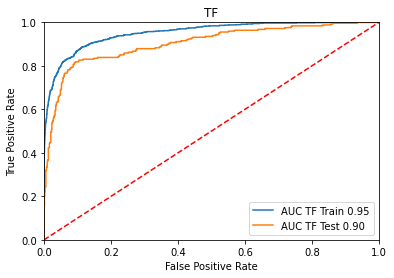

In [72]:
f.print_ROC_Curve('TF', [train_acc_03, test_acc_03])

In [ ]:
#repeating best model () with Sigmoid activation function 

In [73]:

theActivation_sig = tf.keras.activations.sigmoid

LAYER_04_01 = tf.keras.layers.Dense( units=theUnits_1, activation=theActivation_sig, input_dim=theShapeSize_1 )
LAYER_OUTPUT_04 = tf.keras.layers.Dense( units=2, activation=output_activation_1 )

model_04 = tf.keras.Sequential()
model_04.add( LAYER_04_01)
model_04.add( LAYER_OUTPUT_04 )
model_04.compile( loss=theLossMetric_1,optimizer=theOptimizer_1)
model_04.fit( u_train_sub, y_train[target_a], epochs=theEpochs_1, verbose=False )


In [74]:
train_acc_04= f.get_TF_ProbAccuracyScores('TF Train', model_04, u_train_sub, y_train[target_a])
test_acc_04 = f.get_TF_ProbAccuracyScores('TF Test', model_04, u_test_sub, y_test[target_a])
f.print_Accuracy('TF Accuracy', [train_acc_04,test_acc_04])


38/38 [==============================] - 0s 1ms/step
TF Accuracy
TF Train  =  0.8821308724832215
TF Test  =  0.8758389261744967
------




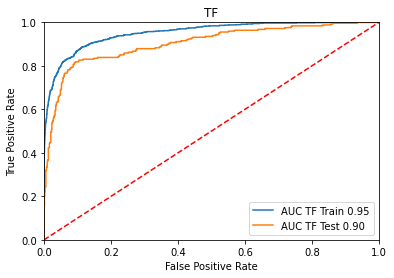

In [75]:
f.print_ROC_Curve('TF', [train_acc_03, test_acc_03])

In [ ]:
#repeating best model () with Tanh activation function 

In [76]:

theActivation_tanh = tf.keras.activations.tanh

LAYER_05_01 = tf.keras.layers.Dense( units=theUnits_1, activation=theActivation_tanh, input_dim=theShapeSize_1 )
LAYER_OUTPUT_05 = tf.keras.layers.Dense( units=2, activation=output_activation_1 )

model_05 = tf.keras.Sequential()
model_05.add( LAYER_05_01)
model_05.add( LAYER_OUTPUT_05 )
model_05.compile( loss=theLossMetric_1,optimizer=theOptimizer_1)
model_05.fit( u_train_sub, y_train[target_a], epochs=theEpochs_1, verbose=False )


In [78]:
train_acc_05= f.get_TF_ProbAccuracyScores('TF Train', model_05, u_train_sub, y_train[target_a])
test_acc_05 = f.get_TF_ProbAccuracyScores('TF Test', model_05, u_test_sub, y_test[target_a])
f.print_Accuracy('TF Accuracy', [train_acc_05,test_acc_05])


38/38 [==============================] - 0s 1ms/step
TF Accuracy
TF Train  =  0.8894714765100671
TF Test  =  0.8758389261744967
------




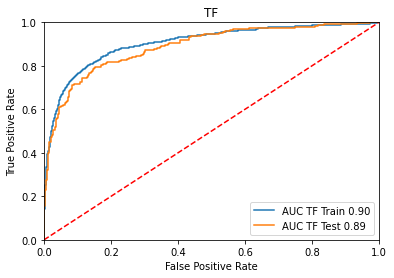

In [79]:
f.print_ROC_Curve('TF', [train_acc_05, test_acc_05])